<a href="https://colab.research.google.com/github/Alan-Hans/Portafolio-DataScientist/blob/main/Challenge1_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Alan Hans Bitterlich Koning <br>
Mail: alan.bitterlich.k@gmail.com <br>
If anyone requires the datasets, please write to the mail :)

For this challenge we present the dataset train.csv and test.csv, we were informed that the challenge is to analyze the behavior of a retail chain and predict future sales (Forecasting problem). <br>

This project will be divided according to:
<br>
1. Data exploration and data cleaning.
2. EDA.
3. Predictive model.
4. Adjust model to our data.
5. Conclusions and questions from the challenge.

# 1. Data exploration and data cleaning.

Import main library´s to use.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.offline as pyoff
import plotly.express as px

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics

train_original = pd.read_csv("datos/train.csv")
test_original = pd.read_csv("datos/test.csv")

print(train_original.tail())
print(test_original.head())

                              invoice_number  \
411209  c16498c9-49fd-4ec8-8273-a890b5db991f   
411210  a596495c-f83b-452a-b54b-f350463ae977   
411211  e327554f-d15a-42f1-bb8c-28249e68283c   
411212  08e2f3d9-6c6a-4bb9-99f6-afa2895ac714   
411213  4f2a1196-cc90-4405-97b2-417049f3a19c   

                                  product_id  \
411209  ec5a6c29-3f63-422a-bd69-5a76a713ffba   
411210  d9eb3dba-5cf2-4d7d-8b31-2afd0480eaa9   
411211  21f2b709-ed07-44e5-bf04-04e7dd50d861   
411212  29926485-3860-41f7-876b-dc235d7f3799   
411213  7fe20103-d0ad-4b78-9cee-58c548d33f31   

                      product_description  quantity                  date  \
411209  VINTAGE HEADS AND TAILS CARD GAME         4  2010-12-05T15:47:00Z   
411210       VINTAGE UNION JACK MEMOBOARD         2  2011-03-31T09:48:00Z   
411211      DAIRY MAID TRADITIONAL TEAPOT         1  2011-10-27T20:09:00Z   
411212      TRADITIONAL CHRISTMAS RIBBONS         2  2011-09-15T14:07:00Z   
411213    6 CHOCOLATE LOVE HEART T-LI

The dataset presents information according to: <br>
1. Number of the invoice.
2. Id of the product.
3. Description of the producto.
4. Quantity of products.
5. Date of the order.
6. Price of the purchase.
7. Id or code of the costumer.
8. State or region.
9. Class of the product.
10. Operational unit.

A copy of both datasets is made. A change in data type is made in the date value, in order to process this as a time scale.

In [ ]:
train = train_original.copy()
test = test_original.copy()

train["date"] = pd.to_datetime(train["date"], 
                              format="%Y-%m-%dT%H:%M:%SZ")
print(train.info())

test["date"] = pd.to_datetime(test["date"], 
                              format="%Y-%m-%dT%H:%M:%SZ")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411214 entries, 0 to 411213
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   invoice_number       411214 non-null  object        
 1   product_id           411214 non-null  object        
 2   product_description  409962 non-null  object        
 3   quantity             411214 non-null  int64         
 4   date                 411214 non-null  datetime64[ns]
 5   product_price        411214 non-null  float64       
 6   customer             411214 non-null  object        
 7   state                411214 non-null  object        
 8   product_class        411214 non-null  object        
 9   operational_unit     411214 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 31.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83086 entries, 0 to 83085
Data columns (total 9 columns)

We proceed to filter the training data. According to null data that could cause garbage as information, in addition it is filtered according to negative values in prices and quantity of products.
The dataframe is reduced from 411214 entries to 409149 entries.

In [ ]:
train = train.dropna()
train = train[(train['quantity'] > 0) & (train['product_price'] > 0)]
print(train.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 401678 entries, 0 to 411213
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   invoice_number       401678 non-null  object        
 1   product_id           401678 non-null  object        
 2   product_description  401678 non-null  object        
 3   quantity             401678 non-null  int64         
 4   date                 401678 non-null  datetime64[ns]
 5   product_price        401678 non-null  float64       
 6   customer             401678 non-null  object        
 7   state                401678 non-null  object        
 8   product_class        401678 non-null  object        
 9   operational_unit     401678 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 33.7+ MB
None


Duplicates are removed. From 409149 entries to 396882.

In [ ]:
train = train.drop_duplicates()
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396882 entries, 0 to 409519
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   invoice_number       396882 non-null  object        
 1   product_id           396882 non-null  object        
 2   product_description  396882 non-null  object        
 3   quantity             396882 non-null  int64         
 4   date                 396882 non-null  datetime64[ns]
 5   product_price        396882 non-null  float64       
 6   customer             396882 non-null  object        
 7   state                396882 non-null  object        
 8   product_class        396882 non-null  object        
 9   operational_unit     396882 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 33.3+ MB
None


The unique amount of data in all columns is analyzed.

In [ ]:
for i in train.columns:
    print(i)
    print('Unique Values: '+str(len(train.groupby([i]).count())))
    print(train[i].value_counts())



invoice_number
Unique Values: 16893
e2424aef-bab9-475d-bd7b-94d64b92c4ed    1005
7fb2be3a-b7d6-4c35-9557-48e04d06dc61     629
eff8acb6-b845-4b7c-ad98-1f970719a79a     594
b73e30e8-f22b-4526-b6aa-b1669b11bec9     588
bddc6a33-137c-4c57-81df-aa9a0debaf1e     559
                                        ... 
aed651ec-3d88-441d-a89f-376c1c1995c8       1
4d694bfc-eb58-46ce-b047-4db44c09871f       1
edc72499-b1b8-4260-90b7-6fed81f0c287       1
c18774b3-2f89-4c02-acf5-dbcf0559730e       1
731a08d2-056e-4aa4-81bf-581364ef8d78       1
Name: invoice_number, Length: 16893, dtype: int64
product_id
Unique Values: 3858
946b1b97-b6a2-4a42-8af4-f162c79936ab    1825
f5d6f016-6f26-4458-809c-7b19e6b709f0    1708
faad9f61-6471-4219-83b6-41cc5539425c    1600
49c8de1c-2614-4517-97bb-b5431f329469    1465
b188fb86-bc1e-47b6-9ef7-0b20116cf6ef    1268
                                        ... 
6e74fec1-7317-4511-8e6f-0ffe8b8dc5e7       1
e47b0515-adf3-40d7-a03a-17a78f988942       1
daa8ff2b-6235-4765-aabc-4c87

It is analyzed, Dates. When the datasets start and extraction by year, week and day.

In [ ]:
train.sort_values(by="date", inplace=True)
sd = train.date.iloc[0]
ed = train.date.iloc[-1]

print("Start Date:", sd)
print("End Date  :", ed)

test.sort_values(by="date", inplace=True)
sd = test.date.iloc[0]
ed = test.date.iloc[-1]

print("Start Date:", sd)
print("End Date  :", ed)



Start Date: 2010-12-01 08:26:00
End Date  : 2011-11-08 18:41:00
Start Date: 2011-11-09 08:11:00
End Date  : 2011-12-09 12:50:00


In [ ]:

train['week_of_year'] = train.date.dt.isocalendar().week
test['week_of_year'] = test.date.dt.isocalendar().week
train['year'] = train.date.dt.isocalendar().year
test['year'] = test.date.dt.isocalendar().week
train['day'] = train.date.dt.isocalendar().day
test['day'] = test.date.dt.isocalendar().day


# 2. Graphics and understanding of the data.



It is graphed according to quantities of products per week. Note that it is being considered in weeks, therefore the year 2010 is being associated as weeks 48-51 and on the other hand the year 2011 from 1 to 45. This is according to the training dataframe.

In [ ]:
tot_quantity = train.groupby(['week_of_year'])['quantity'].sum()
tot_quantity = pd.DataFrame(tot_quantity)
tot_quantity = tot_quantity.reset_index()

tot_quantity

,week_of_year,quantity
0,1,70935
1,2,82583
2,3,137713
3,4,57278
4,5,63556
5,6,46340
6,7,73892
7,8,78530
8,9,63659
9,10,63638


In [ ]:
plot_data = [
    go.Scatter(
        x=tot_quantity["week_of_year"],
        y=tot_quantity['quantity'],
        name='Time Series for num_orders',
        marker = dict(color = 'Blue')
        )
]
plot_layout = go.Layout(
        title='Total quantity per week',
        yaxis_title='Total orders',
        xaxis_title='Week',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

It is graphed according to the number of products per state.

In [ ]:
state = train.groupby(['state'])['quantity'].sum()
state = pd.DataFrame(state).sort_values("quantity",ascending=False)
state = state.reset_index()

In [ ]:
# import matplotlib.pyplot as plt

# state.plot(kind = 'bar', figsize=(10,8), width=0.6)
import plotly.express as px
fig = px.bar(state, x="state", y="quantity", color='state')
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(1, 1, 1, 1)',
})

fig.show()

It is graphed according to the number of products sold.

In [ ]:
product_id = train.groupby(['product_id'])['quantity'].sum()
product_id = pd.DataFrame(product_id).reset_index().sort_values("quantity",ascending=False)
product_id

,product_id,quantity
196,0d93016d-f184-46b1-bad2-16b9e8ad1d13,76981
2538,a75030e3-d62b-4a6e-adfe-1afc20d8c58d,47709
861,3a650bdf-4aee-49c3-8259-4bfd02837fcf,38804
3719,f5d6f016-6f26-4458-809c-7b19e6b709f0,38076
2270,946b1b97-b6a2-4a42-8af4-f162c79936ab,32063
...,...,...
2310,9781bc58-dd14-44ff-8fa5-a487bc5a5476,1
2372,9becfa42-9dc4-46e9-86e3-56633e22f8fd,1
1793,76a57f98-755c-4287-955f-85b3d42def20,1
723,31ee660f-fee0-4388-8ffb-682795e3c328,1


In [ ]:
fig = px.bar(product_id, x="product_id", y="quantity")
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(1, 1, 1, 1)',
})

fig.show()

Graphed according to product type.

In [ ]:
product_class = train.groupby(['product_class'])['quantity'].sum()
product_class = pd.DataFrame(product_class).reset_index().sort_values("quantity",ascending=False)
product_class
import plotly.express as px
fig = px.bar(product_class, x="product_class", y="quantity")
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(1, 1, 1, 1)',
})

fig.show()

A correlation map is made between variables.

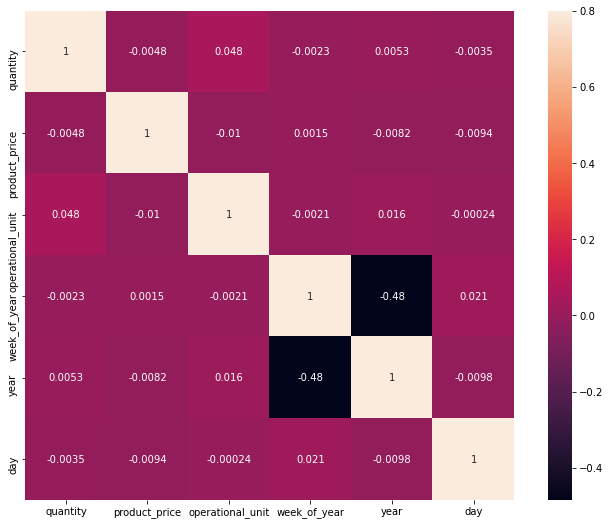

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyoff
import seaborn as sns

corrmat = train.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

It is graphed according to product quantity and type.

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyoff

cat_var = ['product_class',
 'operational_unit']

for i in cat_var:
    grp=train.groupby([i])
    grp=pd.DataFrame(grp)
    lis=grp[0]
    x=0
    plot_data=[]
    for j in lis:
        print(i)
        print(j)
        data = train[train[i]==j]
        data = pd.DataFrame(data)
        tot_orders = data.groupby(['week_of_year'])['quantity'].sum()
        tot_orders = pd.DataFrame(tot_orders)
       
        plot_data.append(go.Scatter(
                x=tot_orders.index,
                y=tot_orders['quantity'],
                name=str(j),

            ))
        
        x+=1
    plot_layout = go.Layout(
            title='Total orders per week for '+str(i),
            yaxis_title='Total orders',
            xaxis_title='Week',
            plot_bgcolor='rgba(0,0,0,0)'
        )
    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)



product_class
A
product_class
B
product_class
C
product_class
D


operational_unit
1
operational_unit
2
operational_unit
3
operational_unit
4
operational_unit
5
operational_unit
7
operational_unit
9
operational_unit
10
operational_unit
14
operational_unit
20
operational_unit
22
operational_unit
24
operational_unit
192


It is graphed according to the sale of products by state and by class.

In [ ]:
state_product_quantity = train.groupby(['state', 'product_class'])['quantity'].sum()
state_product_quantity = state_product_quantity.unstack().fillna(0)
state_product_quantity

product_class,A,B,C,D
state,,,,
Alabama,20.0,78.0,156.0,416.0
Alaska,128.0,98.0,70.0,36.0
Arkansas,499.0,764.0,940.0,2528.0
California,2094.0,4412.0,8468.0,7496.0
Connecticut,95.0,78.0,156.0,168.0
Delaware,300.0,233.0,400.0,250.0
District of Columbia,339.0,687.0,1141.0,1746.0
Florida,2450.0,4144.0,9624.0,10756.0
Georgia,602.0,973.0,1408.0,2747.0


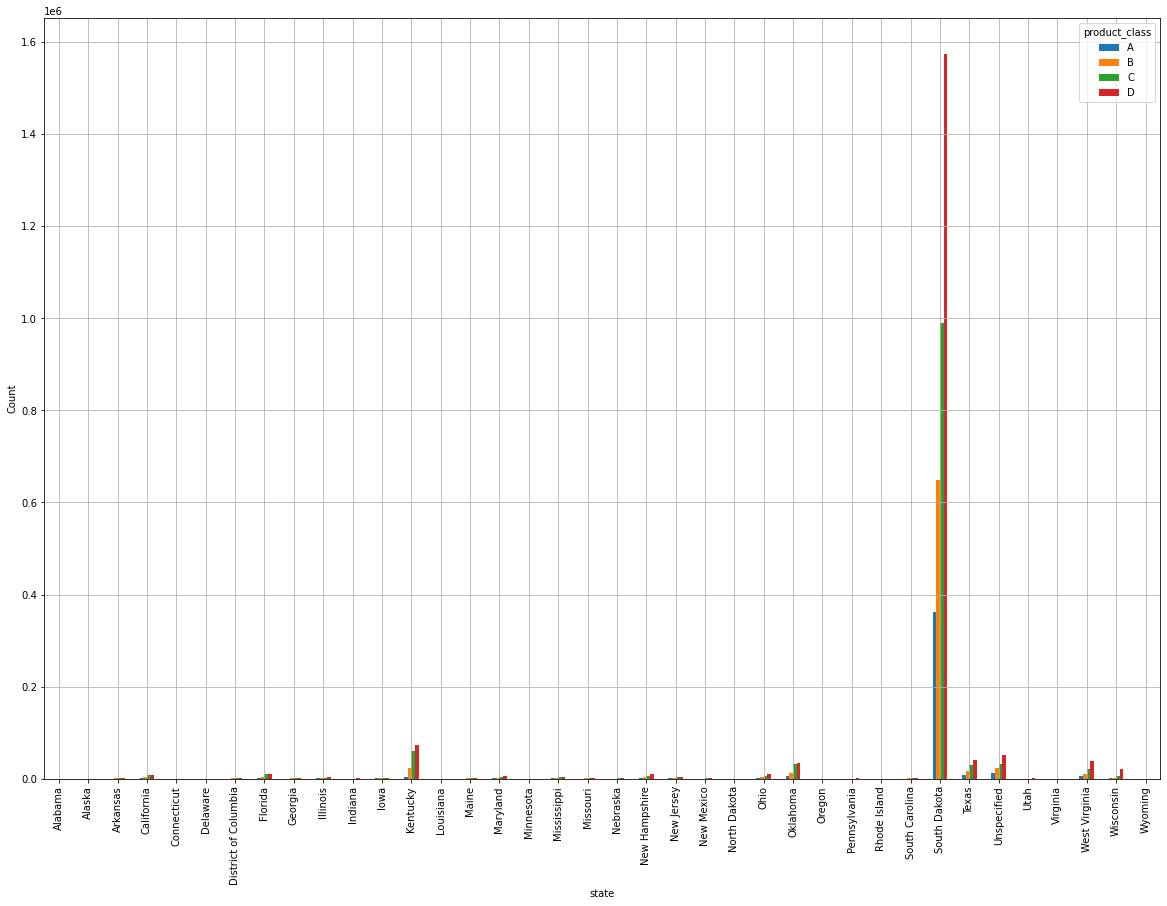

In [ ]:
ax = (state_product_quantity).plot(
kind='bar',
figsize=(20, 14),
grid=True
)
ax.set_ylabel('Count')
plt.show()

# 3. Choice of predictive model.


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396882 entries, 55738 to 257595
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   invoice_number       396882 non-null  object        
 1   product_id           396882 non-null  object        
 2   product_description  396882 non-null  object        
 3   quantity             396882 non-null  int64         
 4   date                 396882 non-null  datetime64[ns]
 5   product_price        396882 non-null  float64       
 6   customer             396882 non-null  object        
 7   state                396882 non-null  object        
 8   product_class        396882 non-null  object        
 9   operational_unit     396882 non-null  int64         
 10  week_of_year         396882 non-null  UInt32        
 11  year                 396882 non-null  UInt32        
 12  day                  396882 non-null  UInt32        
dtypes: UInt32(

The information is processed in order to apply yo the predictive models.

In [ ]:
train = train.iloc[:,[0,1,2,3,5,6,7,8,9,10,11,12]]
cat_var = ['product_class','state',"invoice_number","product_id","product_description",'customer','product_class']
for i in cat_var:
   train[i] = pd.factorize(train[i])[0]

train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 396882 entries, 55738 to 257595
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   invoice_number       396882 non-null  int64  
 1   product_id           396882 non-null  int64  
 2   product_description  396882 non-null  int64  
 3   quantity             396882 non-null  int64  
 4   product_price        396882 non-null  float64
 5   customer             396882 non-null  int64  
 6   state                396882 non-null  int64  
 7   product_class        396882 non-null  int64  
 8   operational_unit     396882 non-null  int64  
 9   week_of_year         396882 non-null  UInt32 
 10  year                 396882 non-null  UInt32 
 11  day                  396882 non-null  UInt32 
dtypes: UInt32(3), float64(1), int64(8)
memory usage: 36.0 MB


We try with both functions in order to enlarge variables and obtained numeric values.
We obtained better results with factorize()

In [ ]:
# train = train.iloc[:,[0,1,2,3,4,5,6,7,9,10,11]]

# train = pd.get_dummies(train, columns=['week_of_year','year'], drop_first=True)

train.head(30)


,invoice_number,product_id,product_description,quantity,product_price,customer,state,product_class,operational_unit,week_of_year,year,day
55738,0,0,0,6,2.55,0,0,0,1,48,2010,3
55753,0,1,1,6,3.39,0,0,0,1,48,2010,3
55841,0,2,2,6,4.25,0,0,1,1,48,2010,3
55914,0,3,3,6,3.39,0,0,0,1,48,2010,3
55933,0,4,4,6,3.39,0,0,0,1,48,2010,3
55940,0,5,5,8,2.75,0,0,0,1,48,2010,3
55726,1,6,6,6,1.85,0,0,2,1,48,2010,3
55899,1,7,7,6,1.85,0,0,2,1,48,2010,3
118579,2,8,8,4,7.95,1,0,1,1,48,2010,3
118589,2,9,9,3,5.95,1,0,1,1,48,2010,3


In [ ]:
from sklearn.preprocessing import StandardScaler

X_cols = list(set(train.columns)-set(['quantity']))
y_col = ['quantity']

X = train[X_cols].values
y = train[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [ ]:
lr = LinearRegression()  
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Root Mean Squared Error for LinearRegression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))

Root Mean Squared Error for LinearRegression: 38.27513243337586
Variance score: 0.04


In [ ]:
# from regressors import stats

# lr.intercept_ = lr.intercept_
# lr.coef_ = lr.coef_.reshape(-1)


# y_test = y_test.reshape(-1)

# print("==========Summary==========")
# stats.summary(lr, X_test, y_test, X_cols)

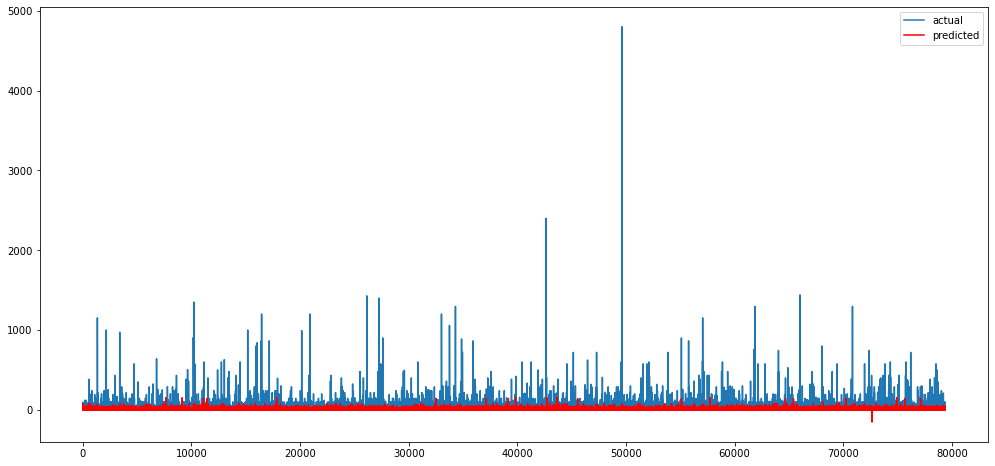

In [ ]:
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

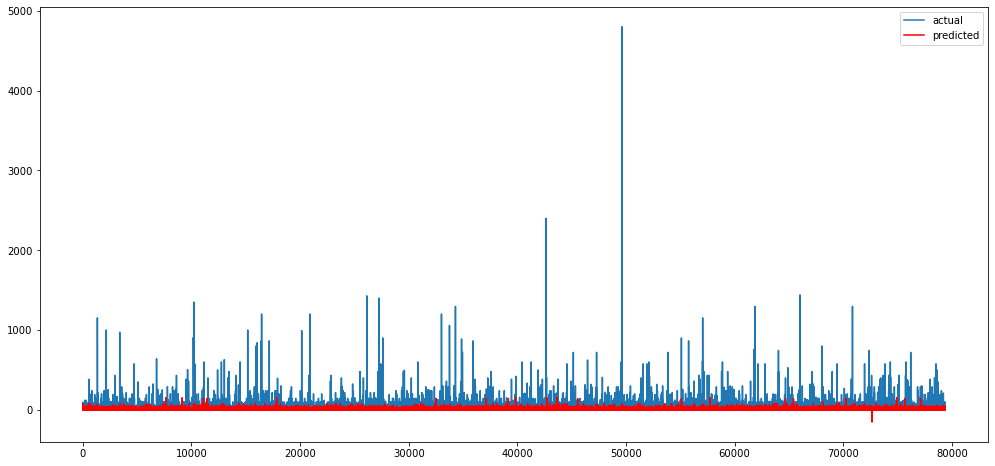

In [ ]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
dt = DecisionTreeRegressor()  
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Root Mean Squared Error for DecisionTree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))

Root Mean Squared Error for DecisionTree: 37.9955984250735
Variance score: 0.05


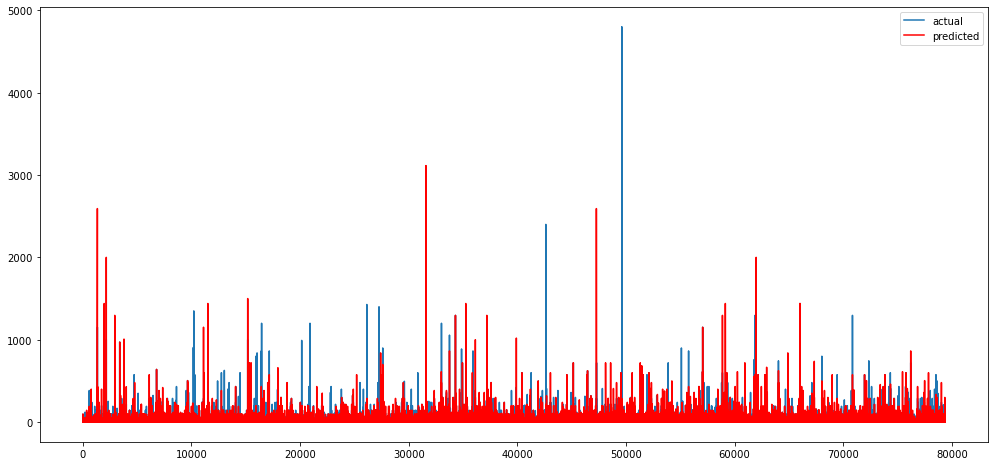

In [ ]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
xgb_model = xgb.XGBRegressor(objective="count:poisson", random_state=40, max_depth= 10, 
eta = 0.9)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))
print('Variance score: %.2f' % (metrics.r2_score(y_test, y_pred)))
predictions = [round(value) for value in y_pred]
print('Variance score: %.2f' % (accuracy_score(y_test, predictions)))



29.962279493311232
Variance score: 0.41
Variance score: 0.17


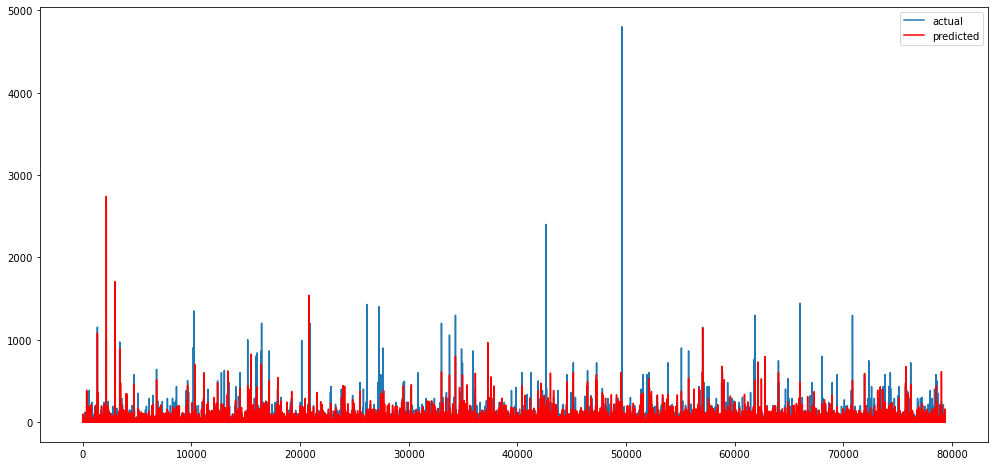

In [ ]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

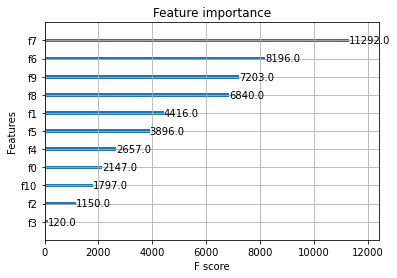

In [ ]:
xgb.plot_importance(xgb_model)


Therefore, 4 predictive models were compared, the one with the lowest mean square error and better R square was the XGB model . Details of the models are attached along with the mean square error and R square:

1. XGB, MSE: 29.96 R2: 0.41


Therefore, for our project, the one that best fits is the XGB model. In addition, the variables that have the greatest influence on the model can be seen. With the comand plot importance.

# 4. Fitting of predictive model to data.

The model test information is reviewed and prepared for use by applying the selected XGB model.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83086 entries, 25978 to 8871
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   invoice_number       83086 non-null  object        
 1   product_id           83086 non-null  object        
 2   product_description  83010 non-null  object        
 3   date                 83086 non-null  datetime64[ns]
 4   product_price        83086 non-null  float64       
 5   customer             83086 non-null  object        
 6   state                83086 non-null  object        
 7   product_class        83086 non-null  object        
 8   operational_unit     83086 non-null  int64         
 9   week_of_year         83086 non-null  UInt32        
 10  year                 83086 non-null  UInt32        
 11  day                  83086 non-null  UInt32        
dtypes: UInt32(3), datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 7.5+ M

In [ ]:
for i in cat_var:
    test[i] = pd.factorize(test[i])[0]
test_ = test.iloc[:,[0,1,2,4,5,6,7,8,9,10,11]]

test_.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 83086 entries, 25978 to 8871
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   invoice_number       83086 non-null  int64  
 1   product_id           83086 non-null  int64  
 2   product_description  83086 non-null  int64  
 3   product_price        83086 non-null  float64
 4   customer             83086 non-null  int64  
 5   state                83086 non-null  int64  
 6   product_class        83086 non-null  int64  
 7   operational_unit     83086 non-null  int64  
 8   week_of_year         83086 non-null  UInt32 
 9   year                 83086 non-null  UInt32 
 10  day                  83086 non-null  UInt32 
dtypes: UInt32(3), float64(1), int64(7)
memory usage: 6.9 MB


In [ ]:
X_train = train.drop(['quantity'], axis=1).values
y_train = train['quantity'].values
X_test = test_.values


Eta and max_depth are adjusted as appropriate to the particular case.

In [ ]:
xgb_model = xgb.XGBRegressor(objective="count:poisson", random_state=40, max_depth= 10, 
eta = 0.09)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [ ]:
test_original = test_original.assign(quantity=y_pred)
test = test.assign(quantity=y_pred)



It is graphed according to total weekly quantity ordered (year 2011) and weekly quantity by number of different orders.

In [ ]:
tot_pred_sum = test.groupby(['week_of_year'])['quantity'].sum()
tot_pred_sum = pd.DataFrame(tot_pred_sum).reset_index()
tot_pred_count = test.groupby(['week_of_year'])['quantity'].count()
tot_pred_count = pd.DataFrame(tot_pred_count).reset_index()

tot_quantity_sum = train.groupby(['week_of_year'])['quantity'].sum()
tot_quantity_sum = pd.DataFrame(tot_quantity)
tot_quantity_sum = tot_quantity_sum.drop(range(45,49,1),axis=0)

tot_quantity_count = train.groupby(['week_of_year'])['quantity'].count()
tot_quantity_count = pd.DataFrame(tot_quantity_count).reset_index()
tot_quantity_count = tot_quantity_count.drop(range(45,49,1),axis=0)

tot_pred_count.loc[0,"quantity"] = tot_quantity_count.loc[44,"quantity"]+tot_pred_count.loc[0,"quantity"]
tot_quantity_count.loc[44,"quantity"] = tot_pred_count.loc[0,"quantity"]

tot_pred_sum.loc[0,"quantity"] = tot_quantity_sum.loc[44,"quantity"]+tot_pred_sum.loc[0,"quantity"]
tot_quantity_sum.loc[44,"quantity"] = tot_pred_sum.loc[0,"quantity"]


In [ ]:
plot_data = [
    go.Scatter(
        x=tot_quantity_count["week_of_year"],
        y=tot_quantity_count['quantity'],
        name='Cantidad semanal por invoice',
        marker = dict(color = 'Blue')
        ),
    go.Scatter(
        x=tot_pred_count["week_of_year"],
        y=tot_pred_count['quantity'],
        name='Cantidad semanal por invoice',
        marker = dict(color = 'Green')
        ),
    go.Scatter(
        x=tot_quantity_sum["week_of_year"],
        y=tot_quantity_sum['quantity'],
        name='Suma de la cantidad total',
        marker = dict(color = 'Blue')
        ),
    go.Scatter(
        x=tot_pred_sum["week_of_year"],
        y=tot_pred_sum['quantity'],
        name='Suma de la cantidad total predicción',
        marker = dict(color = 'Red')
        )        
]

plot_layout = go.Layout(
        title='Cantidad total por semana',
        yaxis_title='Total orders',
        xaxis_title='Week',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

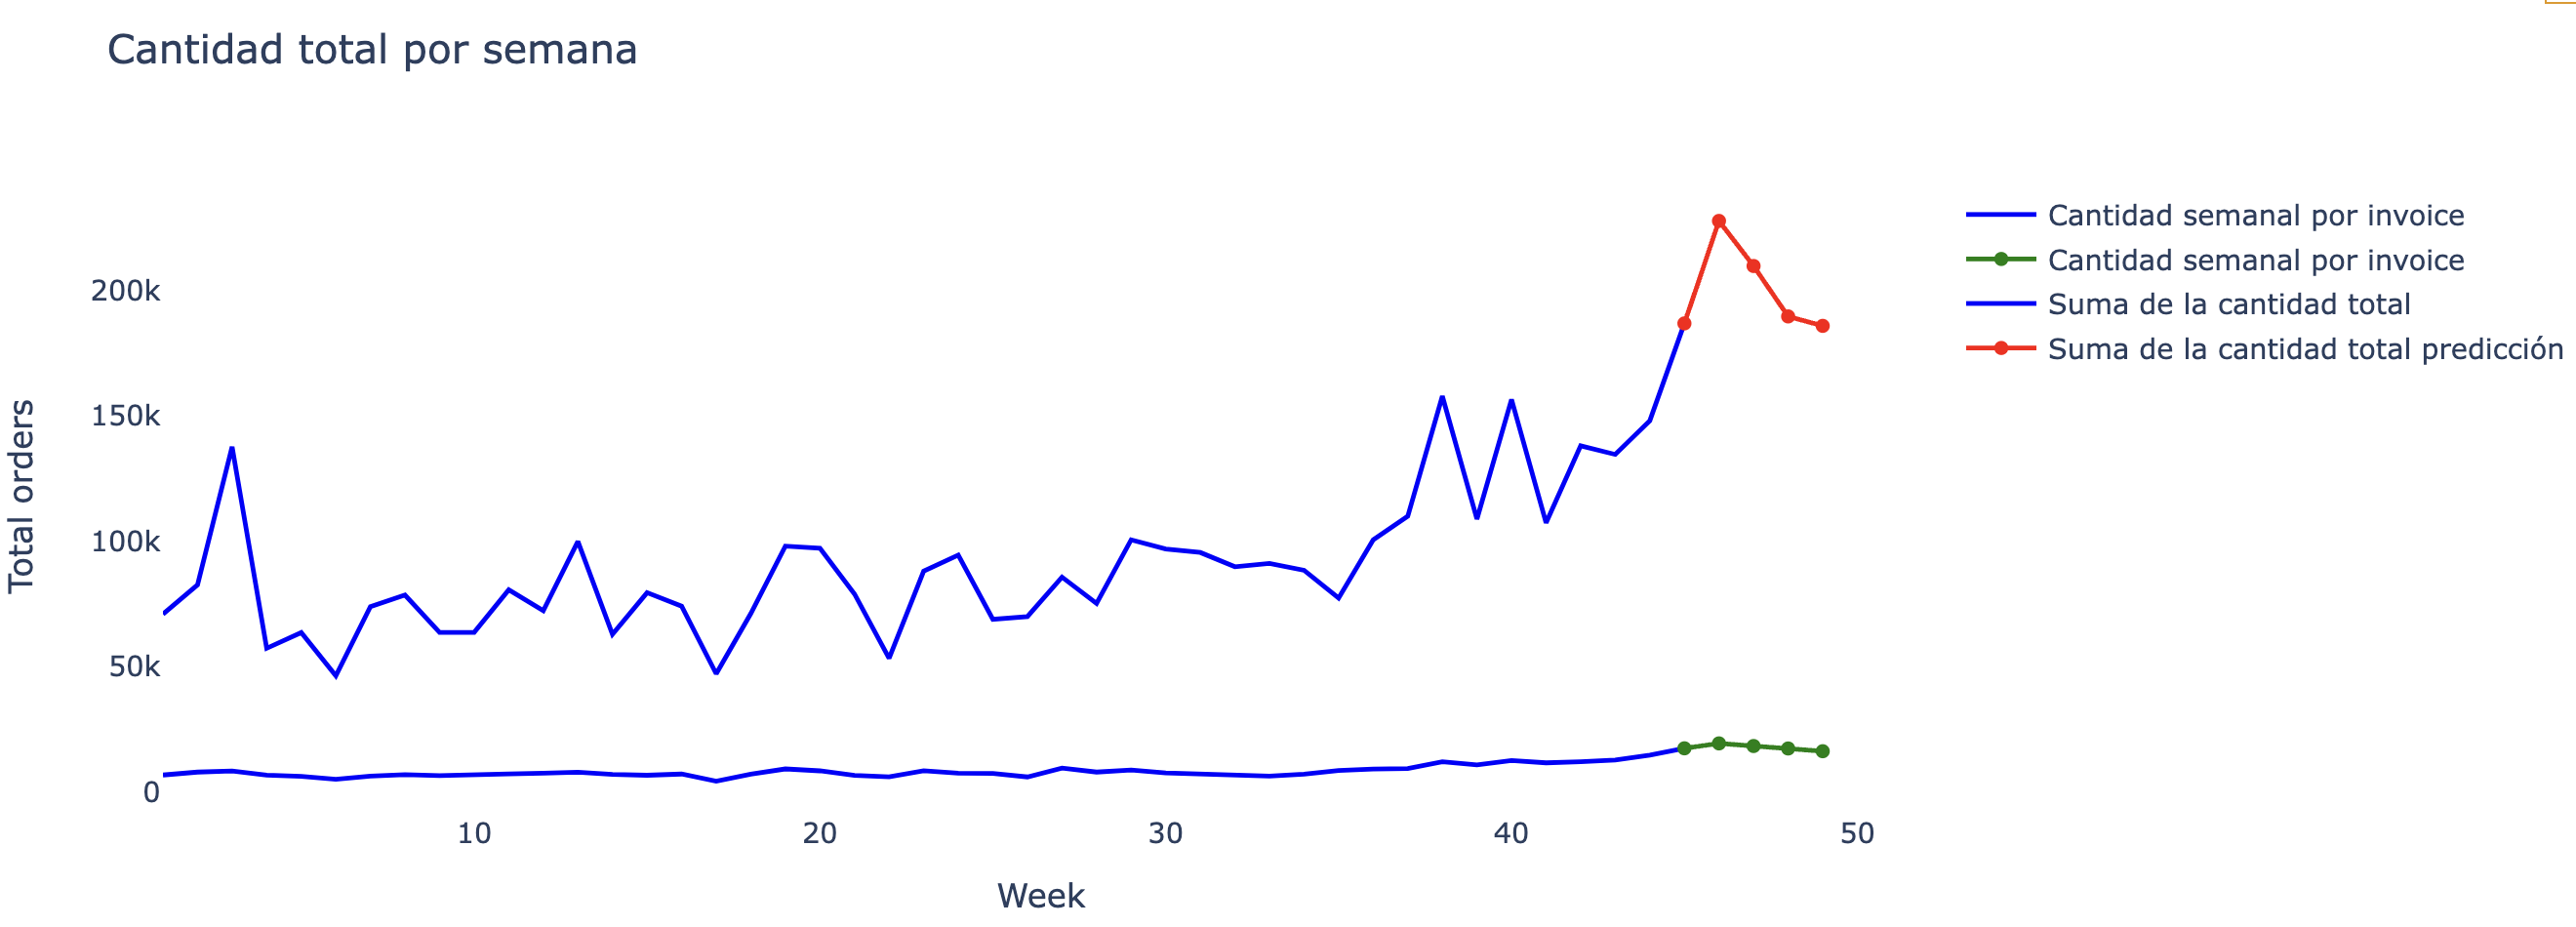

In [ ]:

import plotly.graph_objects as go
 
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])
 
fig.add_trace(
    go.Scatter(x=tot_quantity_count["week_of_year"],
        y=tot_quantity_count['quantity'], name="Cantidad total de pedidos"),
        secondary_y=True)
 
# Use add_trace function and specify secondary_y axes = True.
fig.add_trace(
    go.Scatter(x=tot_pred_count["week_of_year"],
        y=tot_pred_count['quantity'], name="Cantidad total de pedidos predicción (información dada)"),
    secondary_y=True)

fig.add_trace(
    go.Scatter(x=tot_quantity_sum["week_of_year"],
        y=tot_quantity_sum['quantity'], name="Sumatoria pedidos"),
    secondary_y=False)

fig.add_trace(
    go.Scatter(x=tot_pred_sum["week_of_year"],
        y=tot_pred_sum['quantity'], name="Sumatoria pedidos predicción"),
    secondary_y=False)


fig.update_layout(
    title_text="Cantidad de pedidos diferente vs cantidad de sumatoria de pedidos"
)
 
fig.update_xaxes(title_text="Semanas")
 
fig.update_yaxes(title_text="Cantidad total de pedidos ", secondary_y=False)
fig.update_yaxes(title_text="Sumatoria de pedidos diferentes ", secondary_y=True)


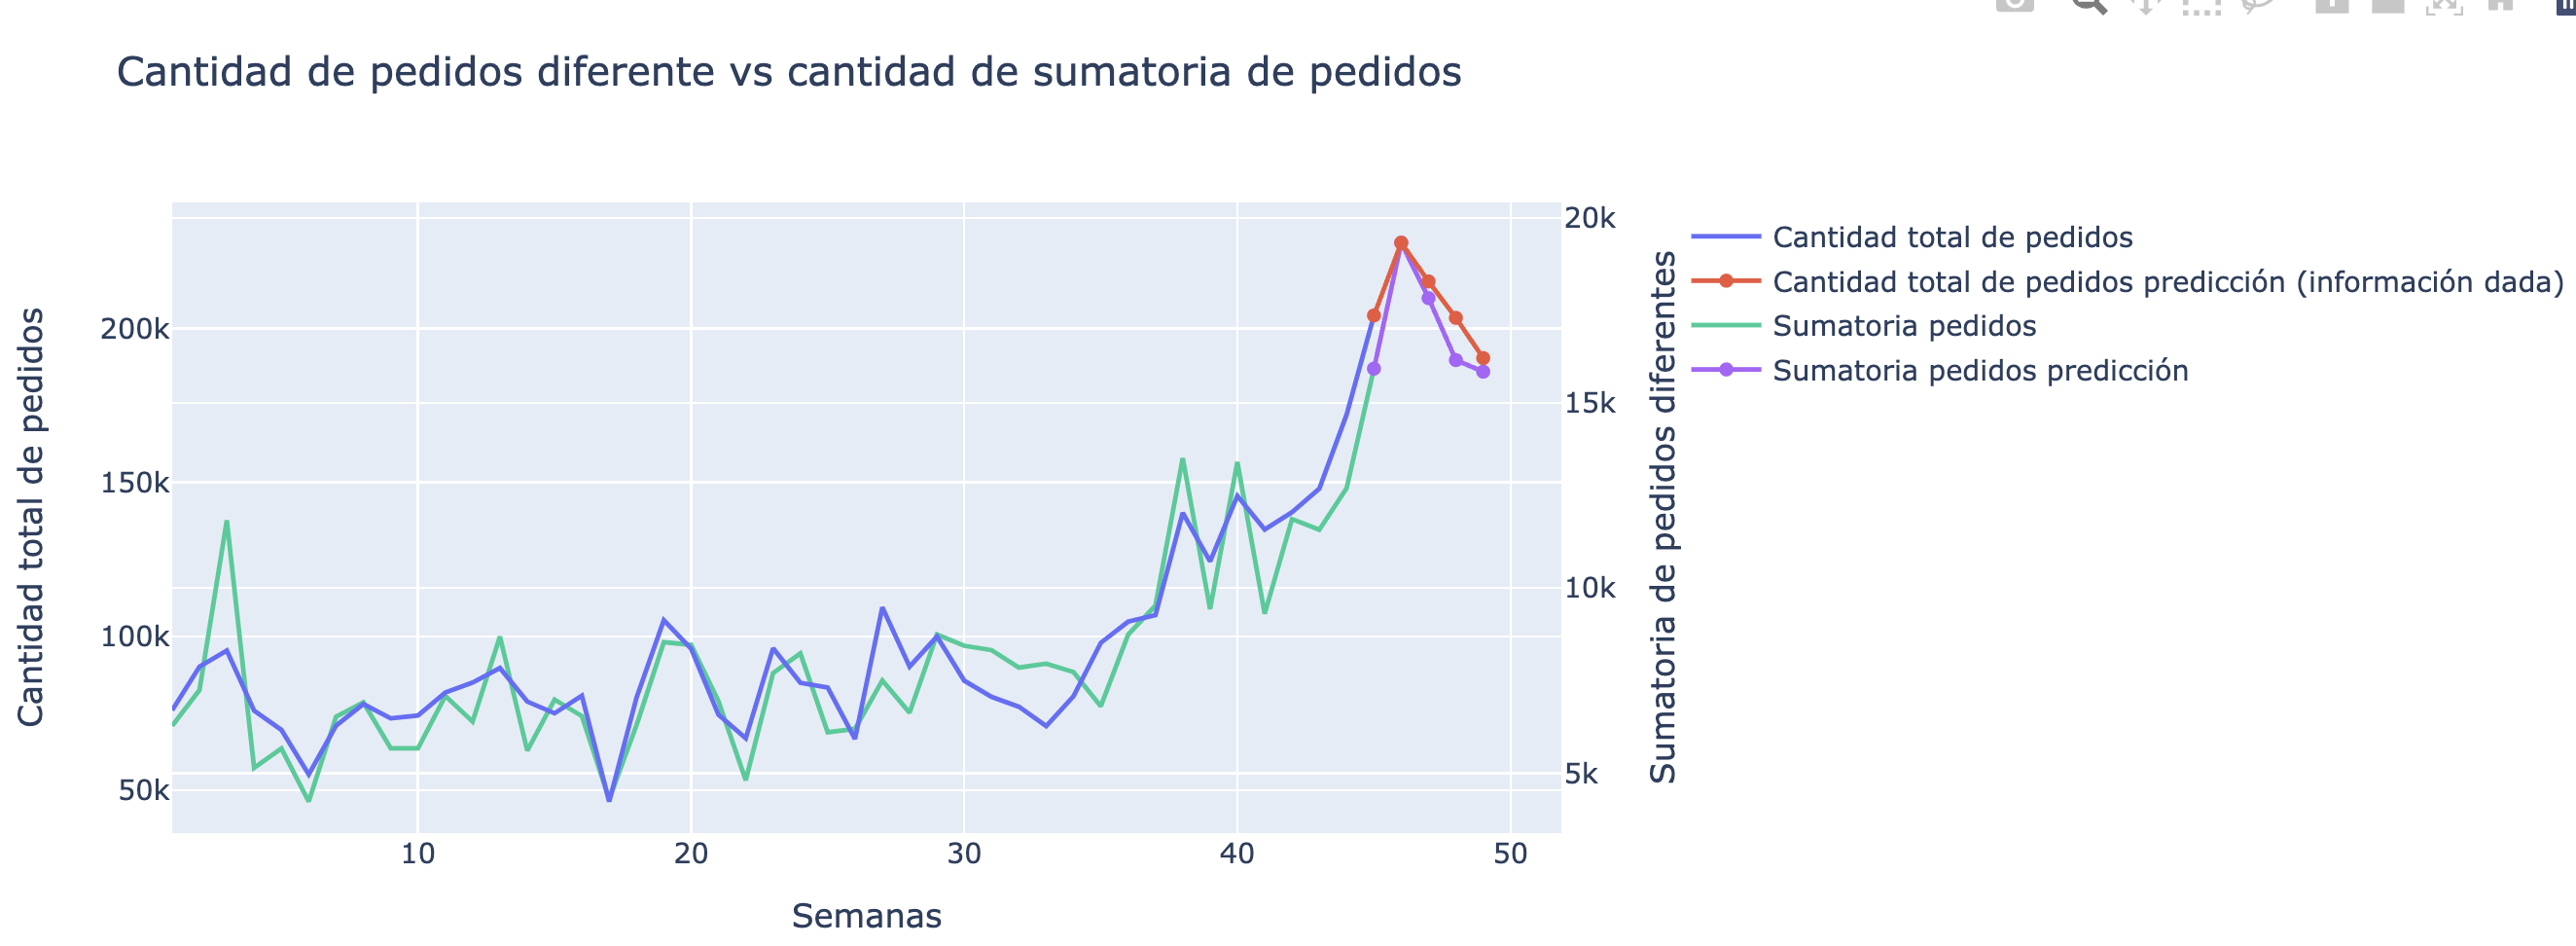

# 5. Conclusions and answers to Challenge questions.



1.	Understand the data and build the best model that is able to predict the quantities sold in the future. The model is at the discretion of the Data Scientist. The prediction will be weekly, and 4 weeks of prediction are requested. <br>

According to the graph given in point 4 above, a weekly prediction of 4 weeks is made, and direct data is attached. It is also noted that the data of week 45 contains the prediction and the value of the training data.
Finally, this prediction follows faithfully the number of invoices and/or different orders being logical because if the number of different orders increases, the number of products requested will increase, as expressed in point 3, in weight of the factors that influence the XGB model.

In [ ]:
tot_pred_sum

,week_of_year,quantity
0,45,186952
1,46,227848
2,47,209855
3,48,189734
4,49,185966


2.	The metrics are left to the discretion of the data scientist, thinking about what the client is looking for.

In this exercise we used the temporality in weeks, positive quantity of products and also these are rounded to an integer, positive price values were considered. It was decided that the metric with the greatest impact is the graph shown in point 4, where the number of different orders vs. products ordered can be seen.

3.	Deliver answers from test.csv dataset as csv file (as extra column of test.csv)


Attached is the file requested in deliverables and also attached is the code that executes the file.

In [ ]:
#test_original.to_csv("test.csv", index=False)

4. How can the solution be complemented? Think of proposals for the costumer.

There are different metrics that can be obtained:
1. total sales in study periods, in order to determine revenues by sales periods.
2. Best selling products.
Trend in products.
4. Importance of stores with respect to products and sales.

In addition, there is a complete follow-up line to customers according to:
1. Tracking of more active and less active customers.
2. Cross products to customers.
3. Customer desertion.

On the other hand, there are improvements to be made where extra data would be needed:
1. Cost of warehousing per product. 2.
3. Logistics between operations center and states.
2. Minimum warehouse dimension required. By quantity of products in forecasting.





5.	What can be the limitations, risks, biases of the models when implementing this type of solutions? What other things need to be considered when implementing a project like this?

As with any predictive model, there are % of error in the model, for this in particular the score give 0.41% wich it could be high but the number of the product and data is high too. In this particular project it is advisable to study extreme products or products that have a large amount of demand, in order not to fail in these products.
On the other hand, it is necessary to observe the trend that occurs in products in order to detect the changes that occur punctually.
For the two points mentioned above, a greater amount of data over time is necessary.
Finally, it is recommended to put emphasis on how to implement a model of these characteristics in different branches considering particular data presented by each branch. 